In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 

In [246]:
Loan_df=pd.read_csv("Loan.csv")

ABOUT THE DATASET
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

In [247]:
Loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


2.ABOUT THE VARIABLES

2.1 The datset is divided into two major variable input n output as mentioned above.The attribute of input variables are as follow"- 1 - Loan_ID  2 - Gender 3 - Married 4 - Dependent 5 - Education 6 - Self_Employeed 7 - ApplicationIncome 8 - CoapplicationIncome 9 - LoanAmount 10 - Loan_Amount_Term 11 - Credit_History 12- Property_Area  The attribute for output variable is:-Loan_Status which is yes or no

2.2 We can see that there are 614 rows and 13 columns including output variable. 3. Checking the dataset by applying various functions as mentioned below:- i head() ii tail iii shape( which shows the no. of rows n columns) iv data types(here we can see whether my data is numerical or categorical)

1


In [248]:
Loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
Loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [250]:
Loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that there is numerical as well categorical data present in the dataset.

In [251]:
Loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Above mentioned are the different columns available in out dataset.

In [252]:
Loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 No null values present in the dataset.

In [253]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


With the help of above function we can get the detailed information about the data like Range index,Colunm name, non-null count, data type and memory usage.

Checking the unique values present in categroical coulumns in the dataset.

In [254]:
Loan_df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [255]:
Loan_df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [256]:
Loan_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [257]:
Loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [258]:
Loan_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [259]:
Loan_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [260]:
Loan_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [261]:
Loan_df=Loan_df.drop(columns = ['Loan_ID'])       # Dropping Loan_ID column

In [262]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Converting the categroical columns in numerical columns

In [263]:
clean_data = {'Gender': {'Male' : 0 , 'Female' : 1} ,
              'Married': {'No': 0 , 'Yes' : 1},
              'Loan_Status' : {'Y':0, 'N':1},
              'Self_Employed':{'No':0,'Yes':1},
              'Education':{'Graduate':0,'Not Graduate':1},
              'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2},
              'Dependents':{'0':0,'1':1,'2':2,'3+':3}
               }
Loan_df = Loan_df.copy()
Loan_df.replace(clean_data, inplace=True)

In [264]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,0,0
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,1,1
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,0,0
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,0,0
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.0,360.0,1.0,1,0
610,0.0,1.0,3.0,0,0.0,4106,0.0,40.0,180.0,1.0,1,0
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.0,360.0,1.0,0,0
612,0.0,1.0,2.0,0,0.0,7583,0.0,187.0,360.0,1.0,0,0


Filling the missing values in the column using mode which helps in removing the null value.

In [307]:
fill_methods = {
    'Gender': 'mode',
    'Married': 'mode',
    'Dependents': 'mode',
    'Self_Employed': 'mode',
    'LoanAmount': 'median',
    'Loan_Amount_Term': 'mode',
    'Credit_History': 'mode'
}
for column, method in fill_methods.items():
    if method == 'mode':
        Loan_df[column].fillna(Loan_df[column].mode()[0], inplace=True)
    elif method == 'median':
        Loan_df[column].fillna(Loan_df[column].median(), inplace=True)

Loan_df['Gender'].fillna(Loan_df['Gender'].mode()[0], inplace=True)
Loan_df['Married'].fillna(Loan_df['Married'].mode()[0], inplace=True)
Loan_df['Dependents'].fillna(Loan_df['Dependents'].mode()[0], inplace=True)
Loan_df['Self_Employed'].fillna(Loan_df['Self_Employed'].mode()[0], inplace=True)
Loan_df['LoanAmount'].fillna(Loan_df['LoanAmount'].median(), inplace=True)
Loan_df['Loan_Amount_Term'].fillna(Loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
Loan_df['Credit_History'].fillna(Loan_df['Credit_History'].mode()[0], inplace=True)


In [308]:
Loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

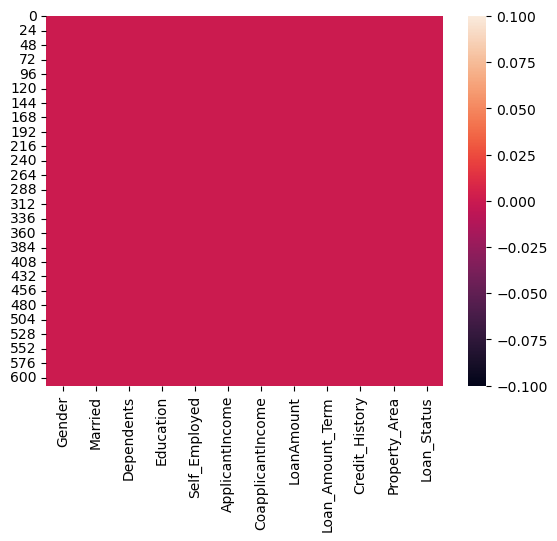

In [267]:
sns.heatmap(Loan_df.isnull())

Inorder to understand the null value in color code format and to have good visual heat map is used to represent the data.As there no null value that why the same color is apperaing on the heat map.

In [268]:
Loan_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.050489,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


After doing all the required changes in the dataset and as there no negative values present in the dataset it looks good to continue the data analysing. Following observations can be done on the bases of describe function. i Count of all the coulumns are equal. ii Right skewness of data is present because in few columns like Gender,Dependent,Education mean is more than median.iii Left Skewness of data can also be seen in columns like Married,Credit_History median is more than mean. iv There are also chances of outlier in some columns becasuse there is major difference in the values of 75% and max in columns like Dependent,ApplicationIncome.

<Axes: >

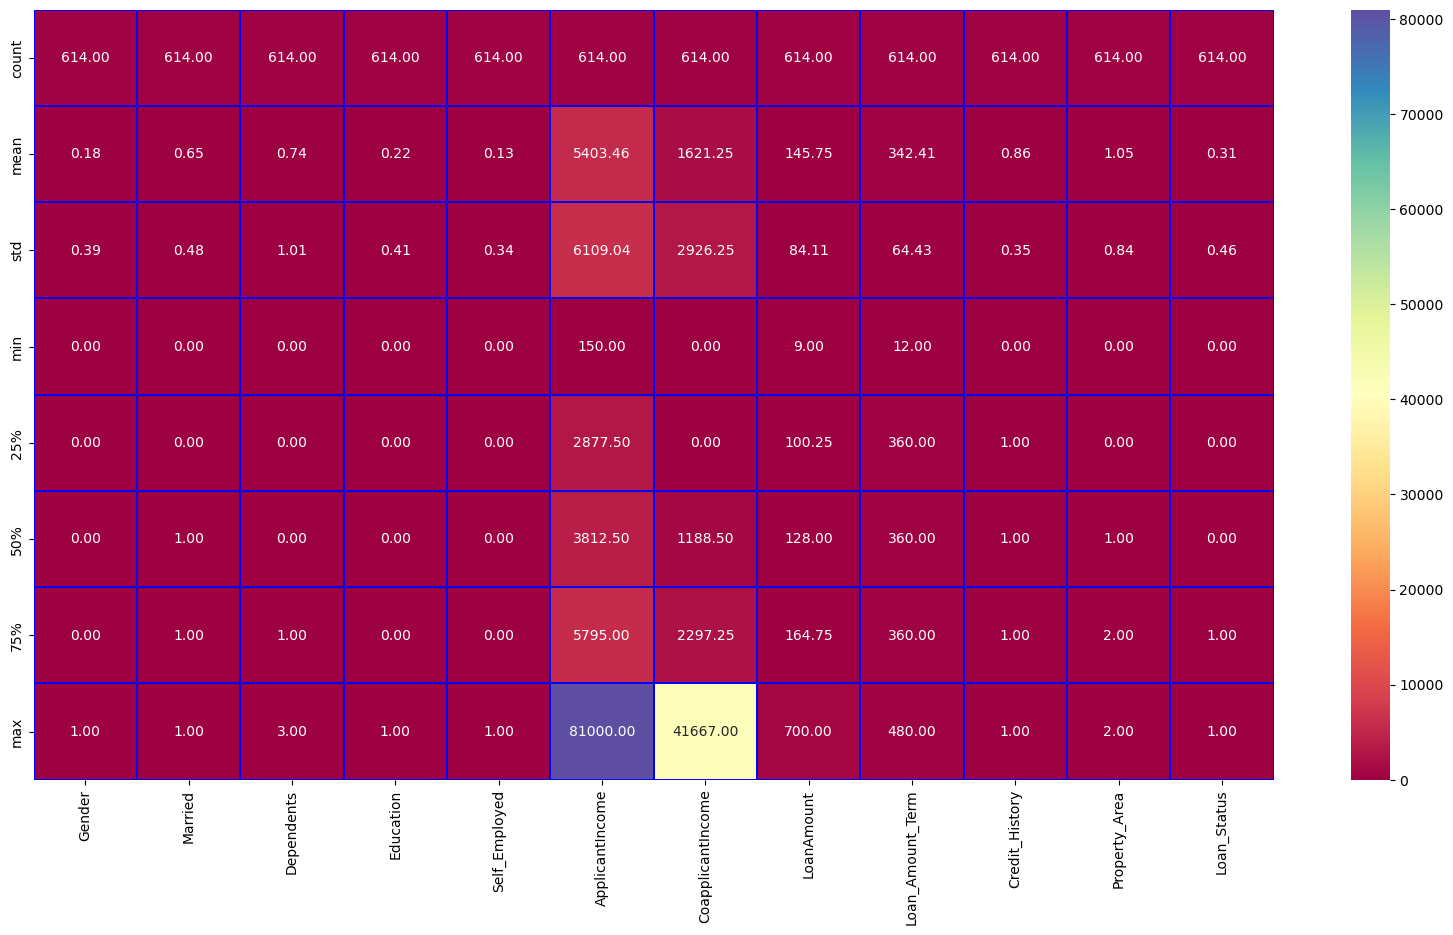

In [269]:
plt.figure(figsize=(20,10))
sns.heatmap(Loan_df.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

Heatmap represention of data after about mean,medain for a better understanding.

GRHAPICAL ANALYSIS

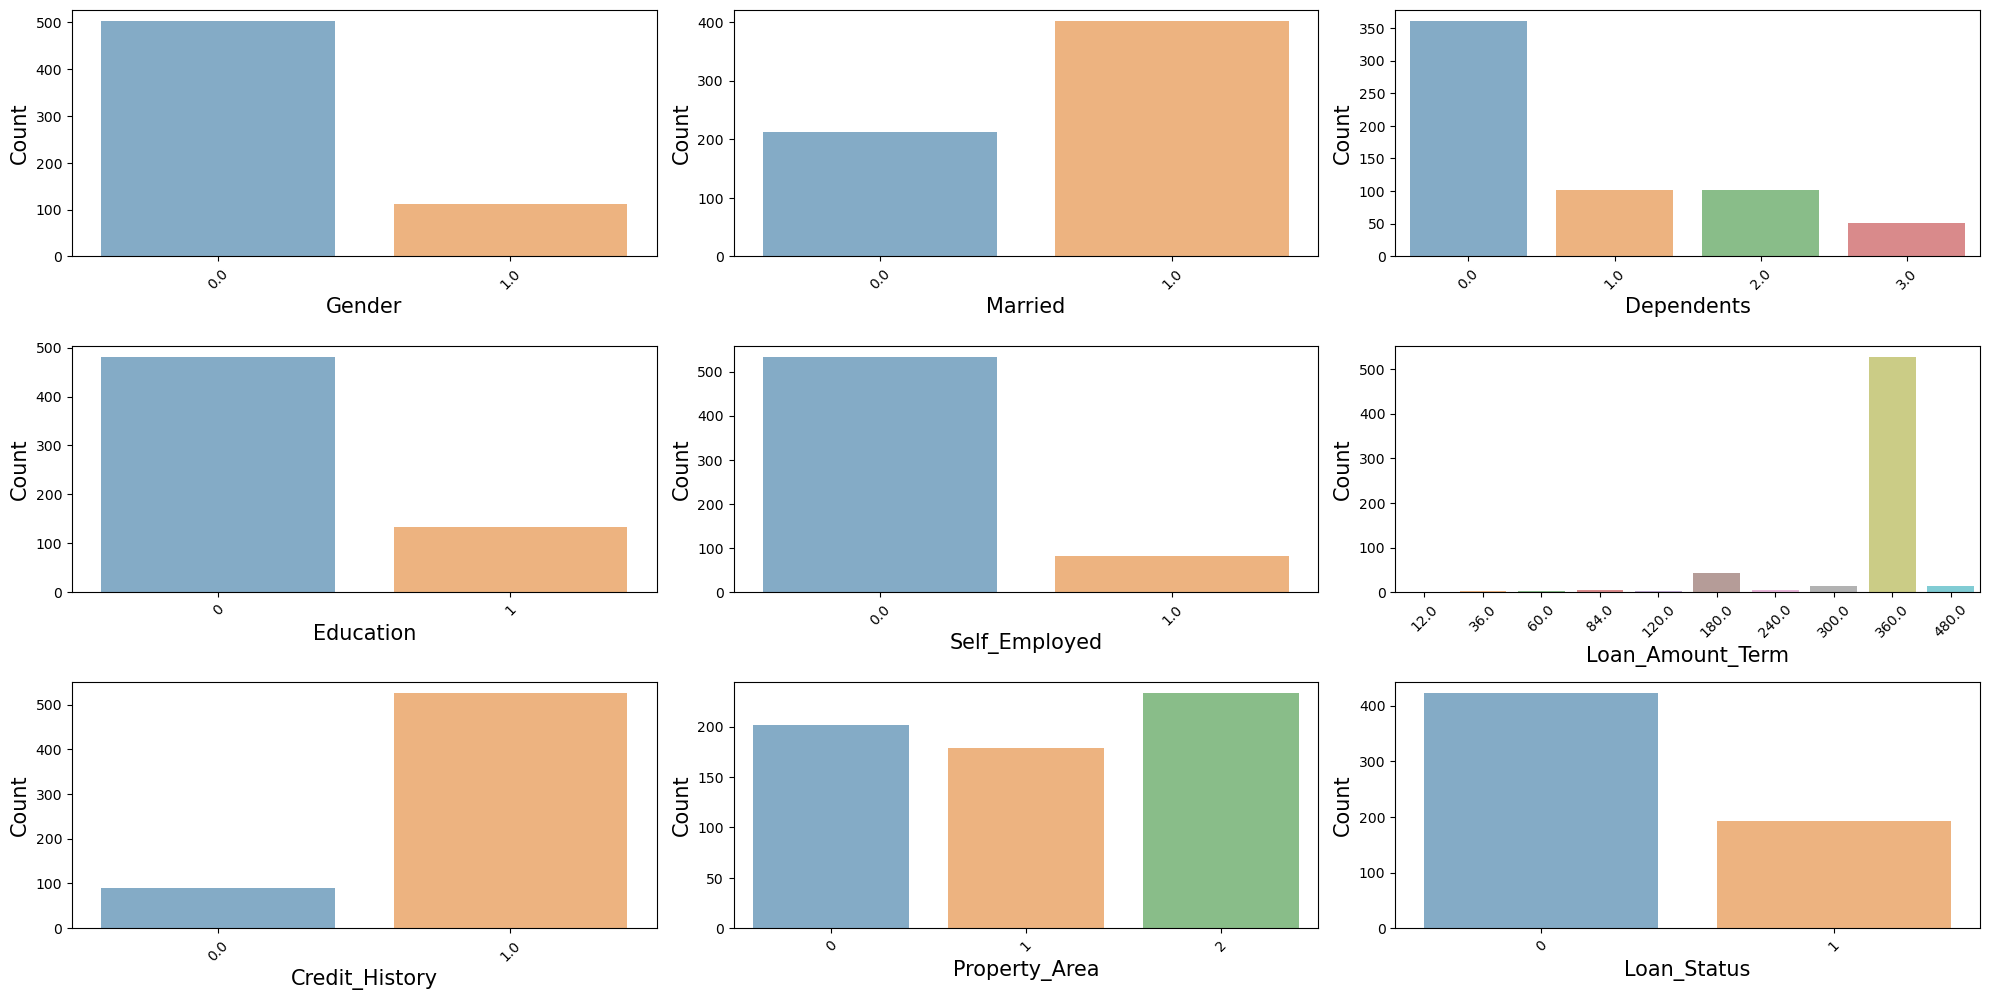

In [316]:
plt.figure(figsize=(20, 33), facecolor='white')
plotnumber = 1
for column in Loan_df.columns:
    if Loan_df[column].dtype == 'object' or Loan_df[column].nunique() < 20:  
        ax = plt.subplot(10, 3, plotnumber)
        sns.countplot(data=Loan_df, x=column, alpha=0.6, ax=ax)  
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.xticks(rotation=45)
        plotnumber += 1


plt.tight_layout()
plt.show()

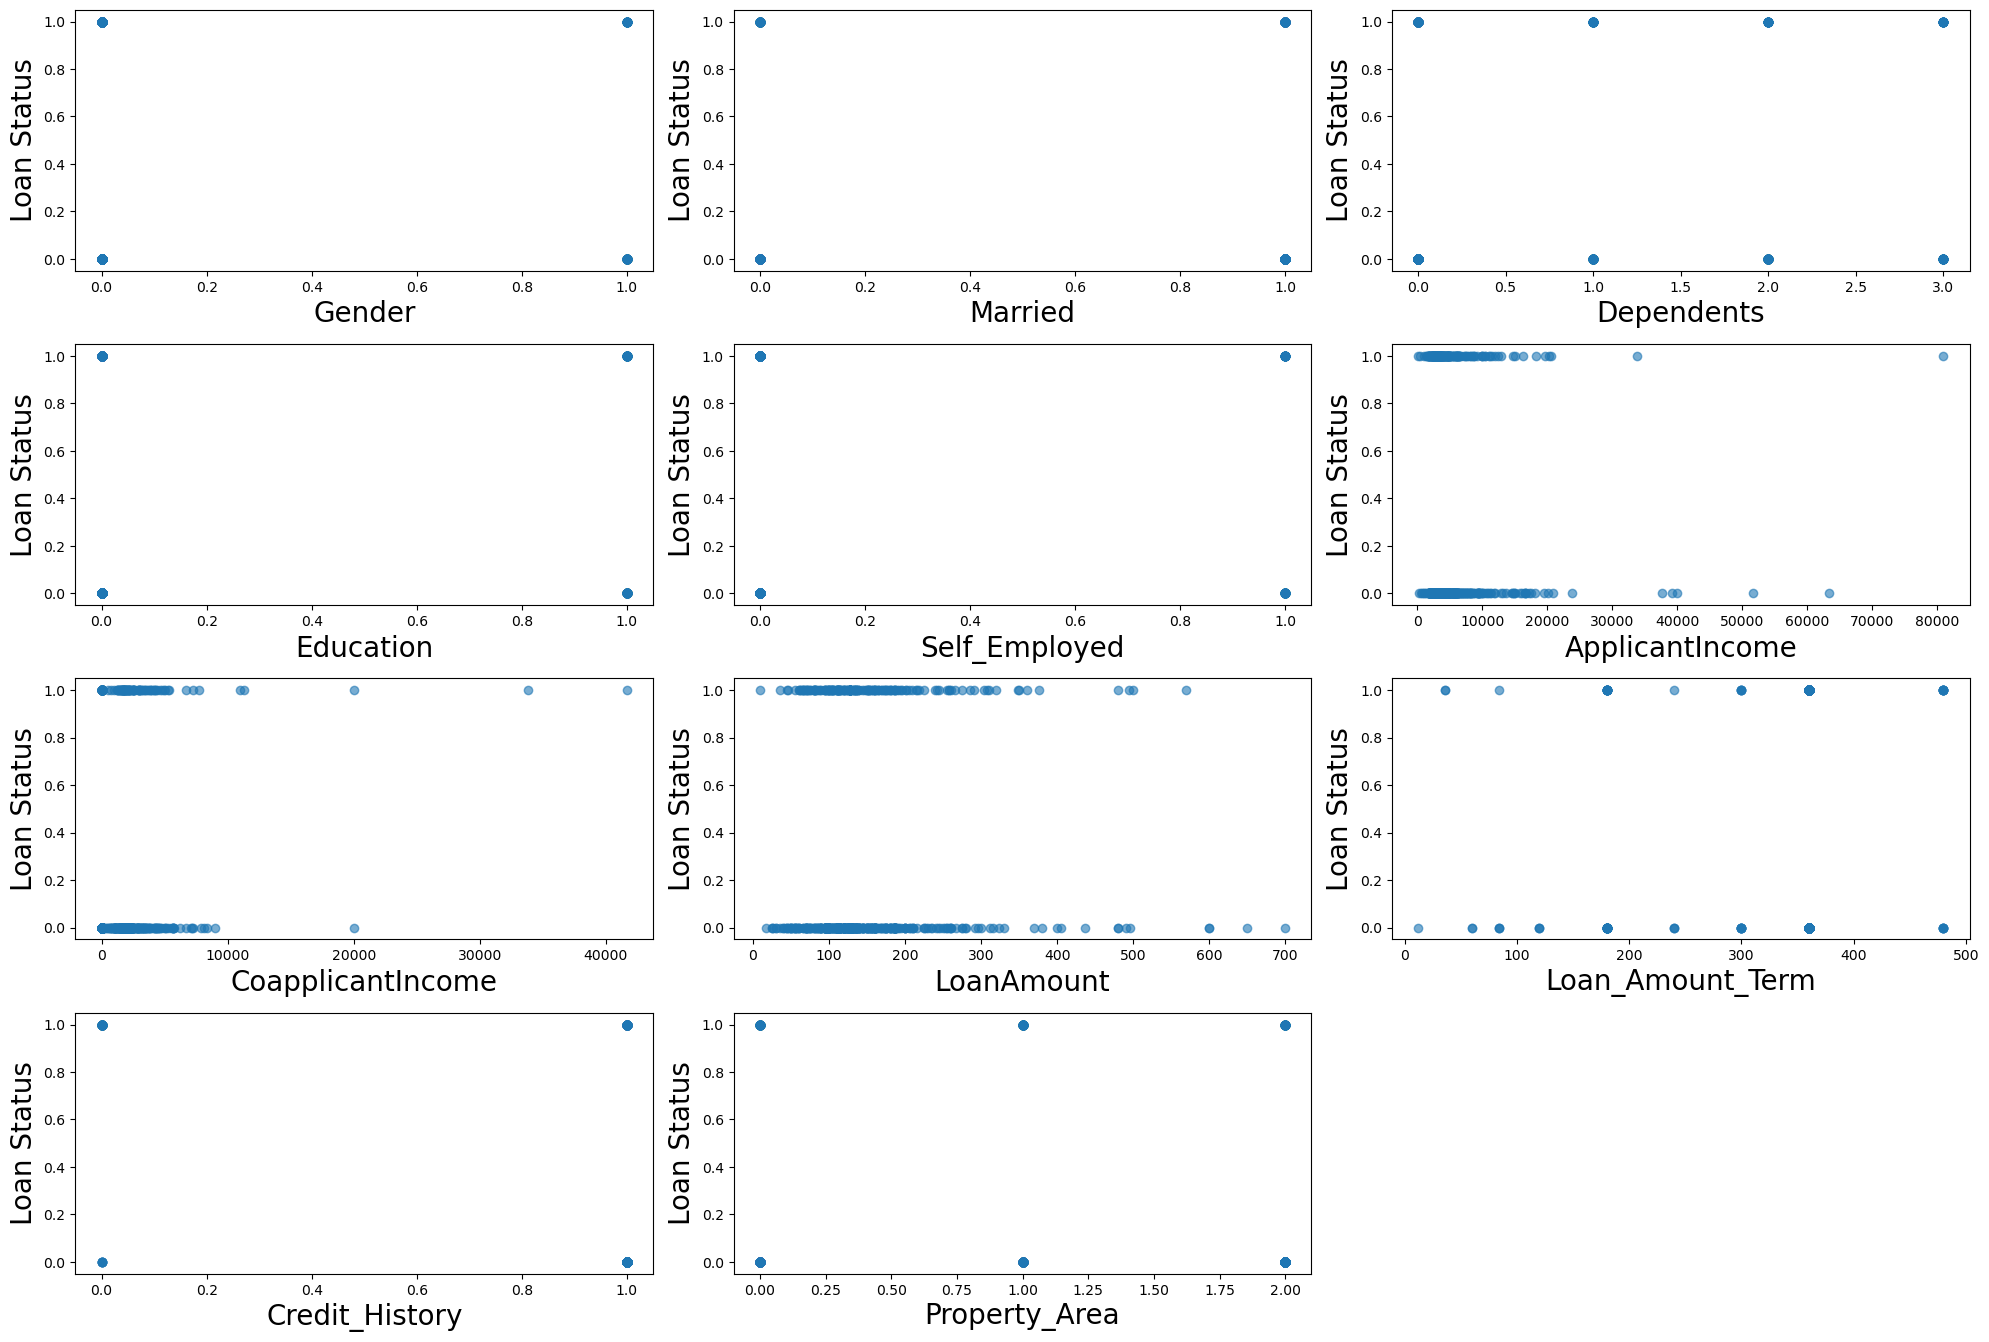

In [272]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Loan_df:
    if column != 'Loan_Status': 
            ax=plt.subplot(10,3,plotnumber)
            plt.scatter(Loan_df[column], Loan_df['Loan_Status'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Loan Status', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()


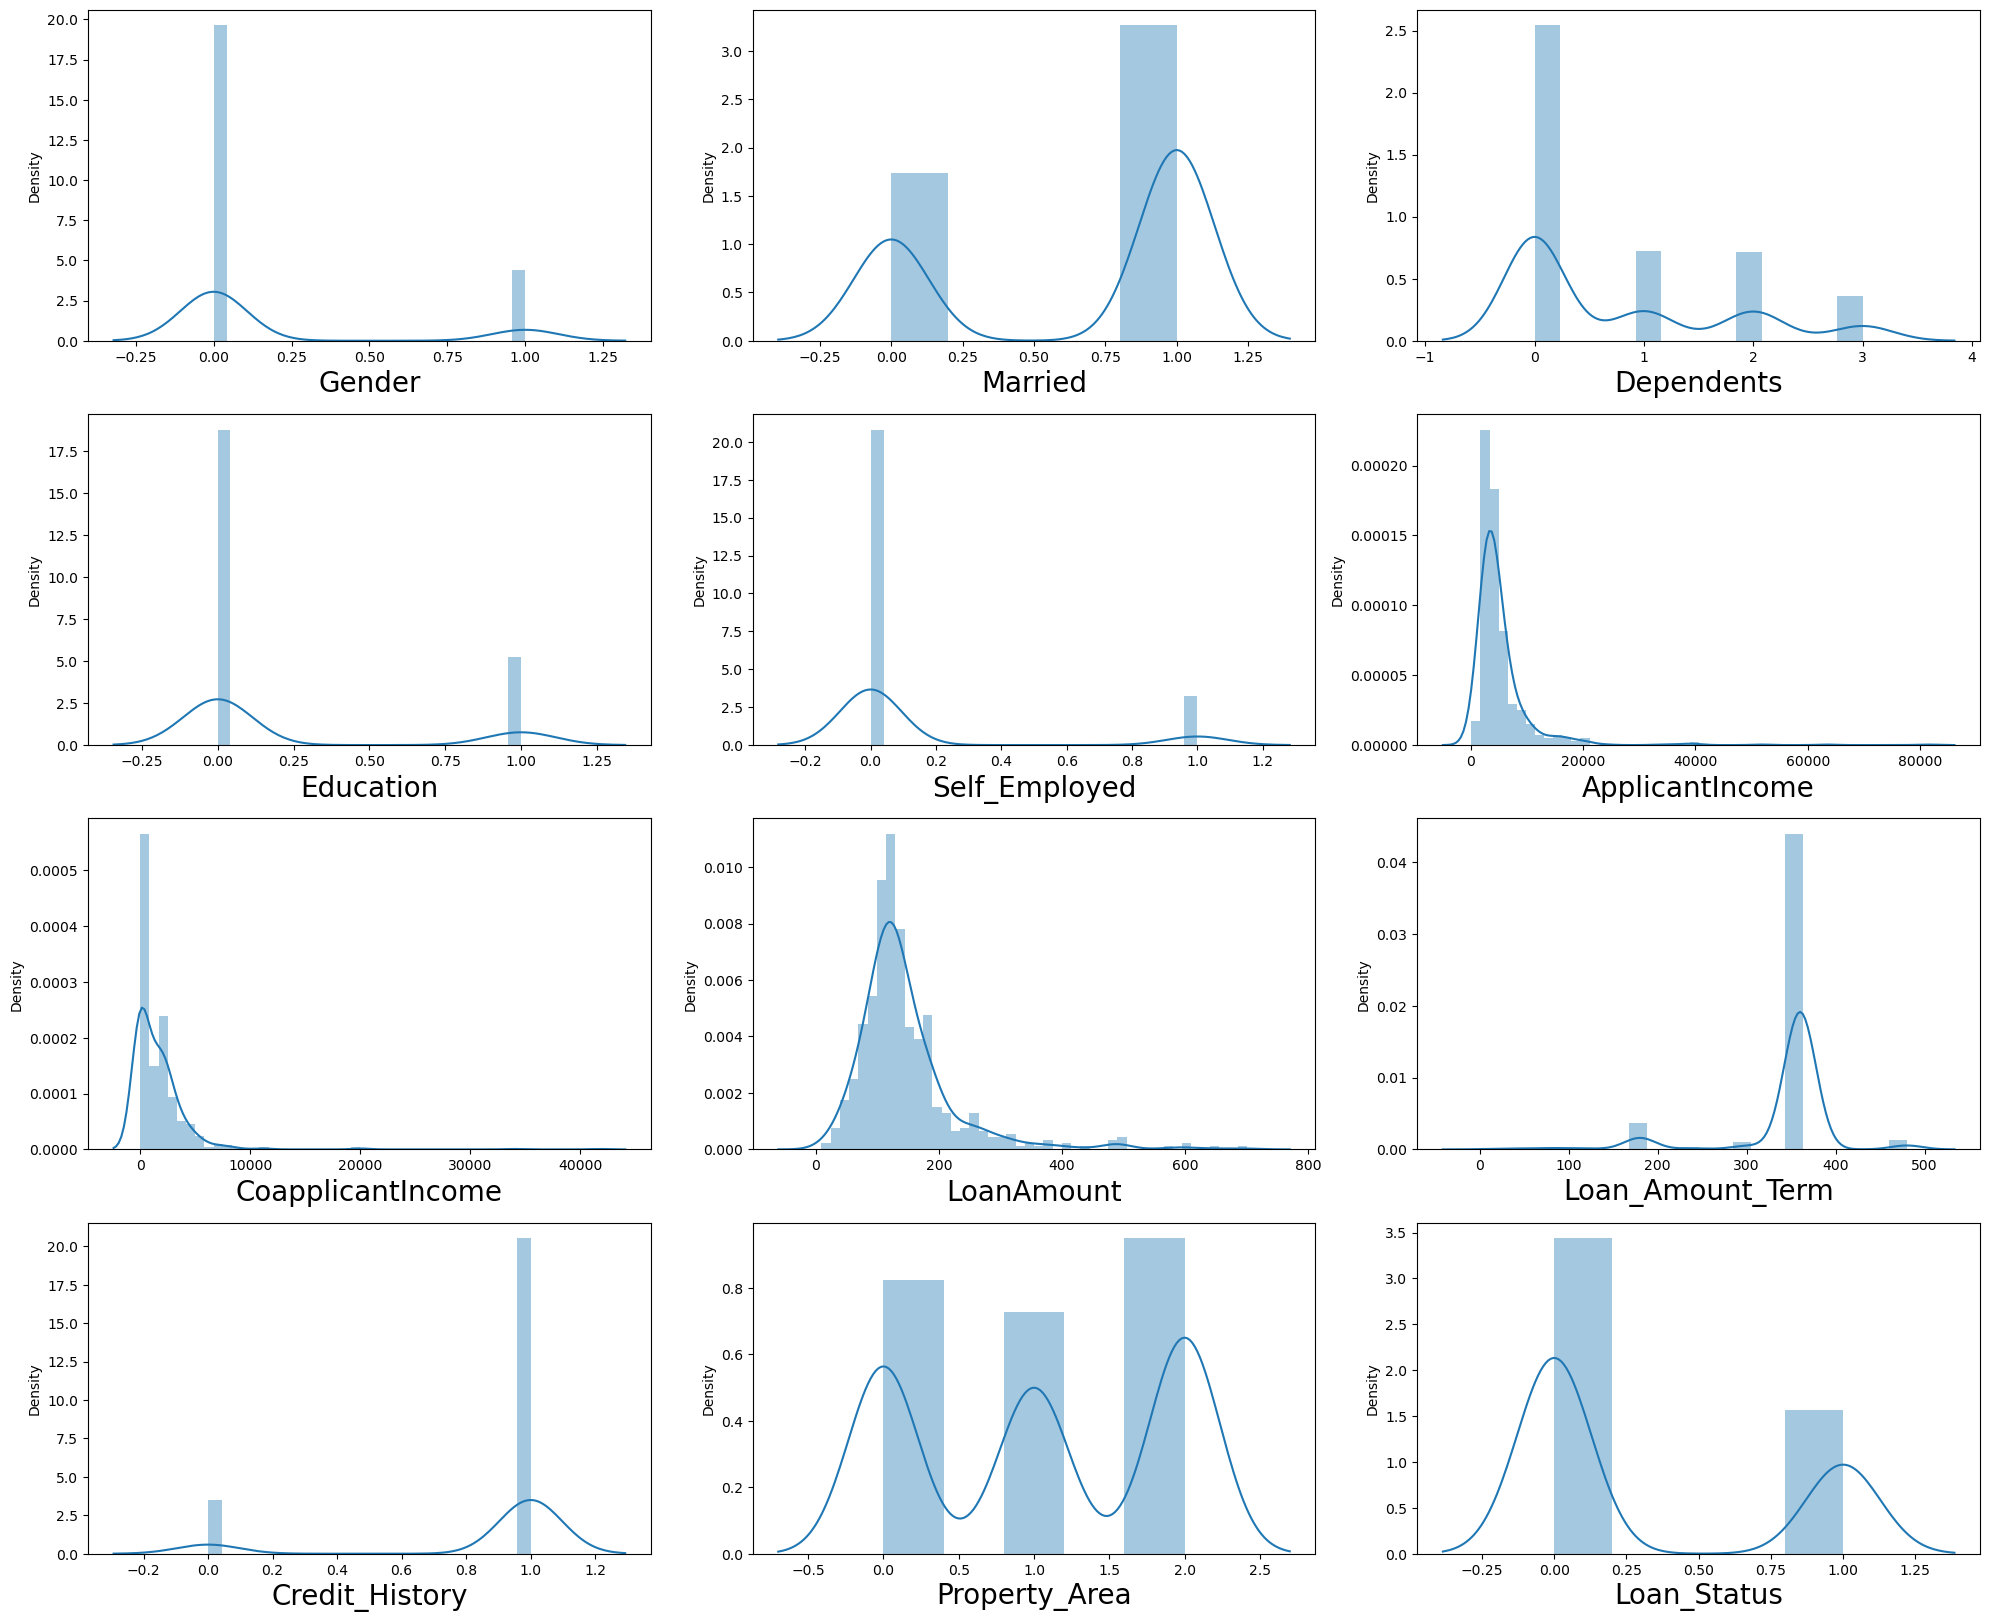

In [273]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in Loan_df:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(Loan_df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


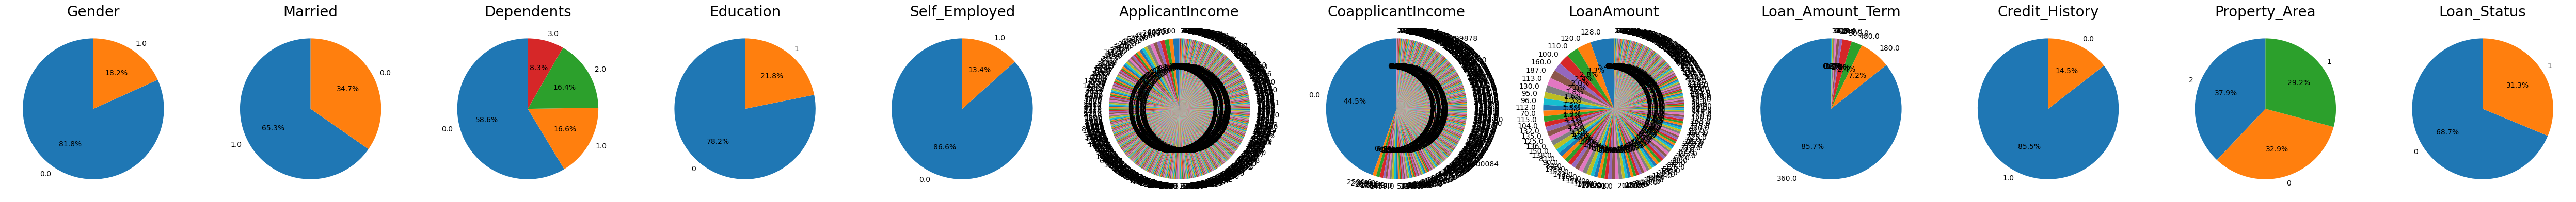

In [274]:
plt.figure(figsize=(50,25))
plotnumber = 1
for column in Loan_df:
    if plotnumber<=12:
        ax = plt.subplot(1,12,plotnumber)
        data = Loan_df[column].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
        plt.title(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()
 

<Axes: xlabel='Gender', ylabel='Loan_Status'>

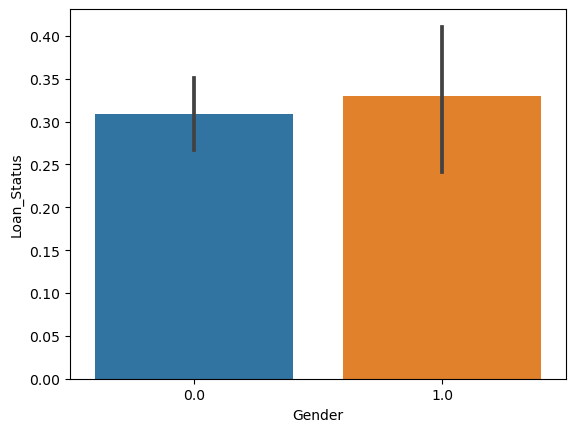

In [275]:
sns.barplot(data=Loan_df, x="Gender", y="Loan_Status")

<Axes: xlabel='Married', ylabel='Loan_Status'>

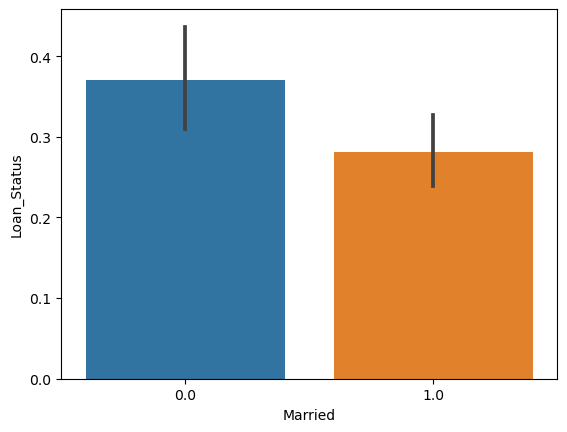

In [276]:
sns.barplot(data=Loan_df, x="Married", y="Loan_Status")

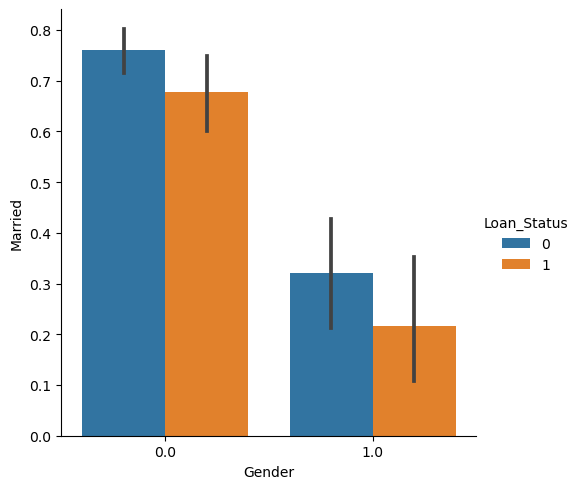

In [277]:
sns.catplot(x="Gender", y="Married",hue="Loan_Status",kind="bar",data=Loan_df)

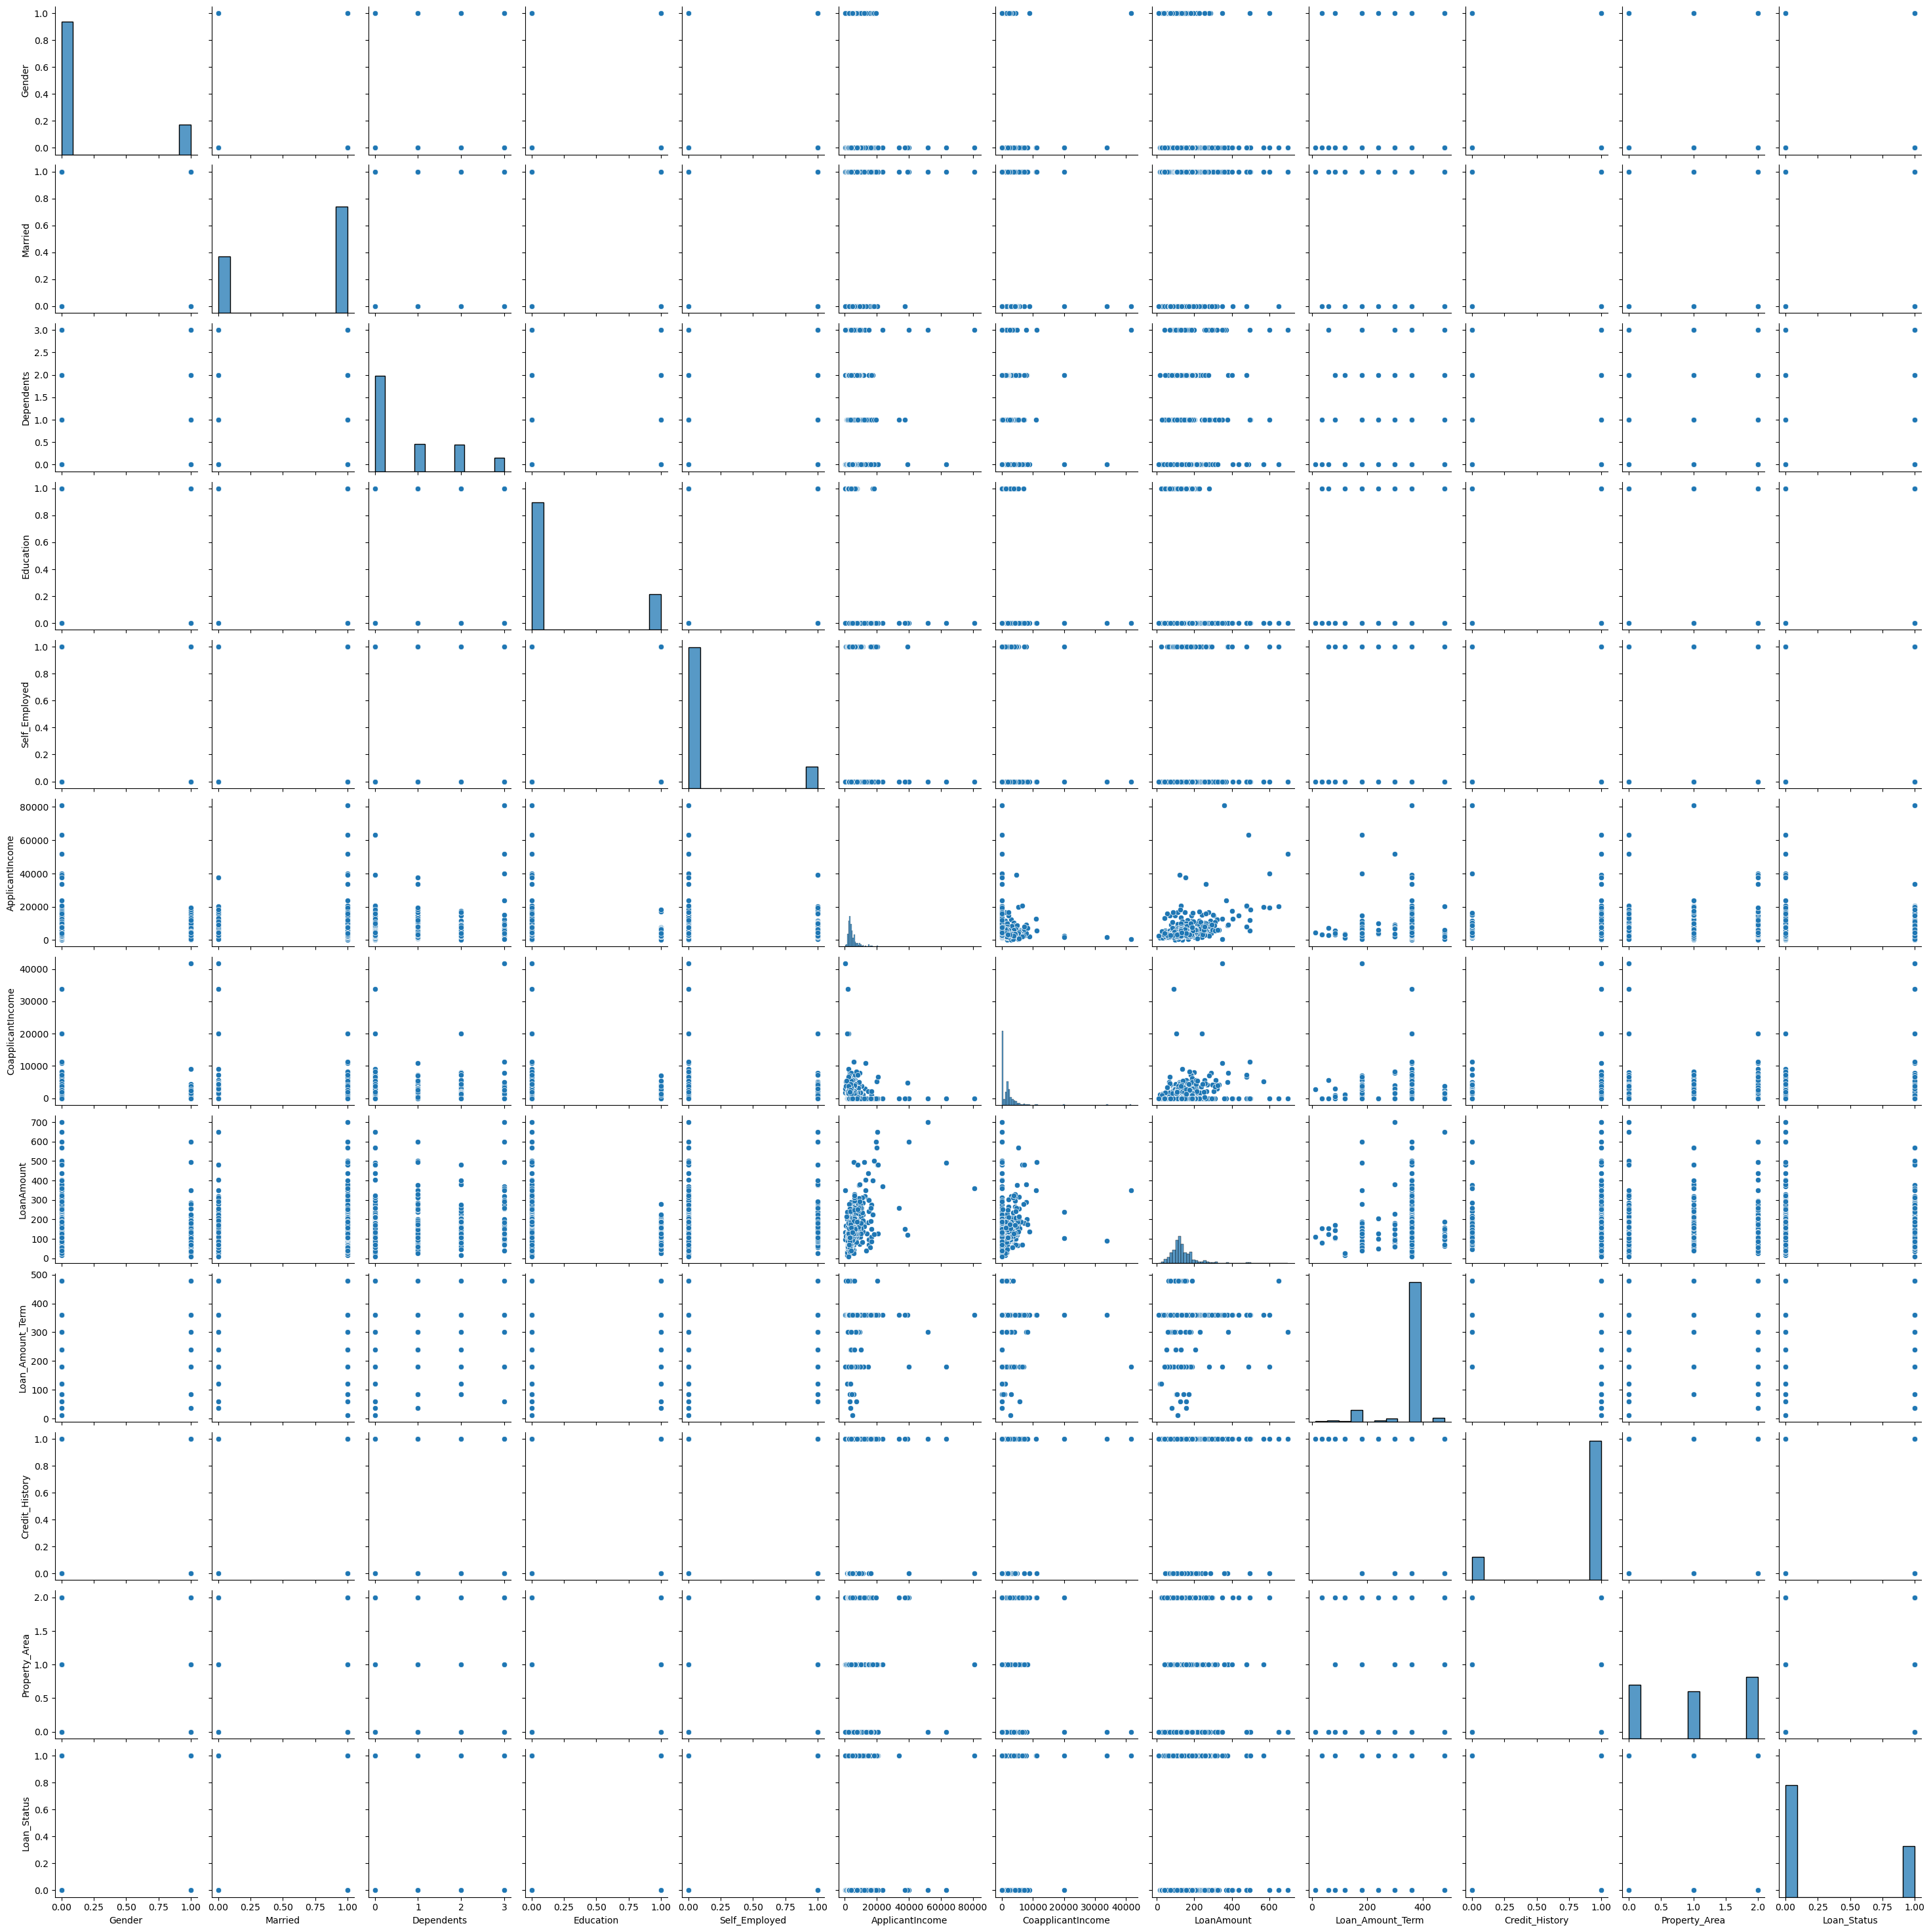

In [278]:
sns.pairplot(Loan_df)

Gender                   Axes(0.125,0.77;0.227941x0.11)
Married               Axes(0.398529,0.77;0.227941x0.11)
Dependents            Axes(0.672059,0.77;0.227941x0.11)
Education               Axes(0.125,0.638;0.227941x0.11)
Self_Employed        Axes(0.398529,0.638;0.227941x0.11)
ApplicantIncome      Axes(0.672059,0.638;0.227941x0.11)
CoapplicantIncome       Axes(0.125,0.506;0.227941x0.11)
LoanAmount           Axes(0.398529,0.506;0.227941x0.11)
Loan_Amount_Term     Axes(0.672059,0.506;0.227941x0.11)
Credit_History          Axes(0.125,0.374;0.227941x0.11)
Property_Area        Axes(0.398529,0.374;0.227941x0.11)
Loan_Status          Axes(0.672059,0.374;0.227941x0.11)
dtype: object

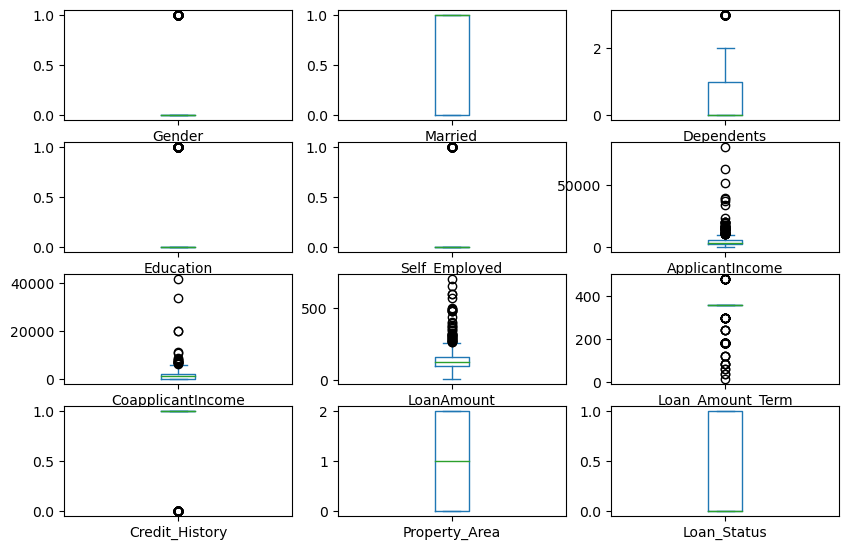

In [317]:
Loan_df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

In [280]:
from scipy.stats import zscore
out_liers=Loan_df[['Gender','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(out_liers))
z

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.472343,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.472343,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.472343,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.472343,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...,...,...,...
609,2.117107,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733
610,0.472343,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.472343,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.472343,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733


In [281]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604]),
 array([4, 6, 6, 6, 3, 5, 6, 3, 5, 3, 5, 4, 5, 3, 3, 6, 6, 5, 5, 6, 3, 5,
        5, 4, 3, 4, 5, 3, 5, 6, 6, 5, 5, 5, 6, 5, 6, 4, 6, 4, 5]))

In [282]:
data=Loan_df[(z<3).all(axis=1)]
data.shape

(577, 12)

In [283]:
print("dataloss",((Loan_df.shape[0]-data.shape[0])/Loan_df.shape[0])*100)

dataloss 6.026058631921824


The data loss is less than 10 that's why are dropping the data ang going ahead with new data set.

In [284]:
data.skew().sort_values(ascending=False)

Self_Employed        2.252848
ApplicantIncome      2.148522
Gender               1.622920
CoapplicantIncome    1.350517
Education            1.306588
LoanAmount           1.151525
Dependents           1.052106
Loan_Status          0.822635
Property_Area       -0.091645
Married             -0.630211
Credit_History      -1.976043
Loan_Amount_Term    -2.098806
dtype: float64

Checking the skewness of the data and then removing it by using cuberoot and squareroot method.Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed).

In [285]:
data[['CoapplicantIncome','ApplicantIncome','LoanAmount','Self_Employed']]=np.sqrt(data[['CoapplicantIncome','ApplicantIncome','LoanAmount','Self_Employed']])

In [286]:
data.skew().sort_values(ascending=False)

Self_Employed        2.252848
Gender               1.622920
Education            1.306588
ApplicantIncome      1.208613
Dependents           1.052106
Loan_Status          0.822635
LoanAmount           0.359495
CoapplicantIncome    0.207591
Property_Area       -0.091645
Married             -0.630211
Credit_History      -1.976043
Loan_Amount_Term    -2.098806
dtype: float64

In [287]:
data['Self_Employed']=np.cbrt(data['Self_Employed'])

In [288]:
data.skew().sort_values(ascending=False)

Self_Employed        2.252848
Gender               1.622920
Education            1.306588
ApplicantIncome      1.208613
Dependents           1.052106
Loan_Status          0.822635
LoanAmount           0.359495
CoapplicantIncome    0.207591
Property_Area       -0.091645
Married             -0.630211
Credit_History      -1.976043
Loan_Amount_Term    -2.098806
dtype: float64

In [289]:
data[['Loan_Amount_Term','Credit_History']] = data[['Loan_Amount_Term','Credit_History']] ** 2


In [290]:
data.skew().sort_values(ascending=False)

Self_Employed        2.252848
Gender               1.622920
Education            1.306588
ApplicantIncome      1.208613
Dependents           1.052106
Loan_Status          0.822635
LoanAmount           0.359495
CoapplicantIncome    0.207591
Property_Area       -0.091645
Married             -0.630211
Loan_Amount_Term    -0.939069
Credit_History      -1.976043
dtype: float64

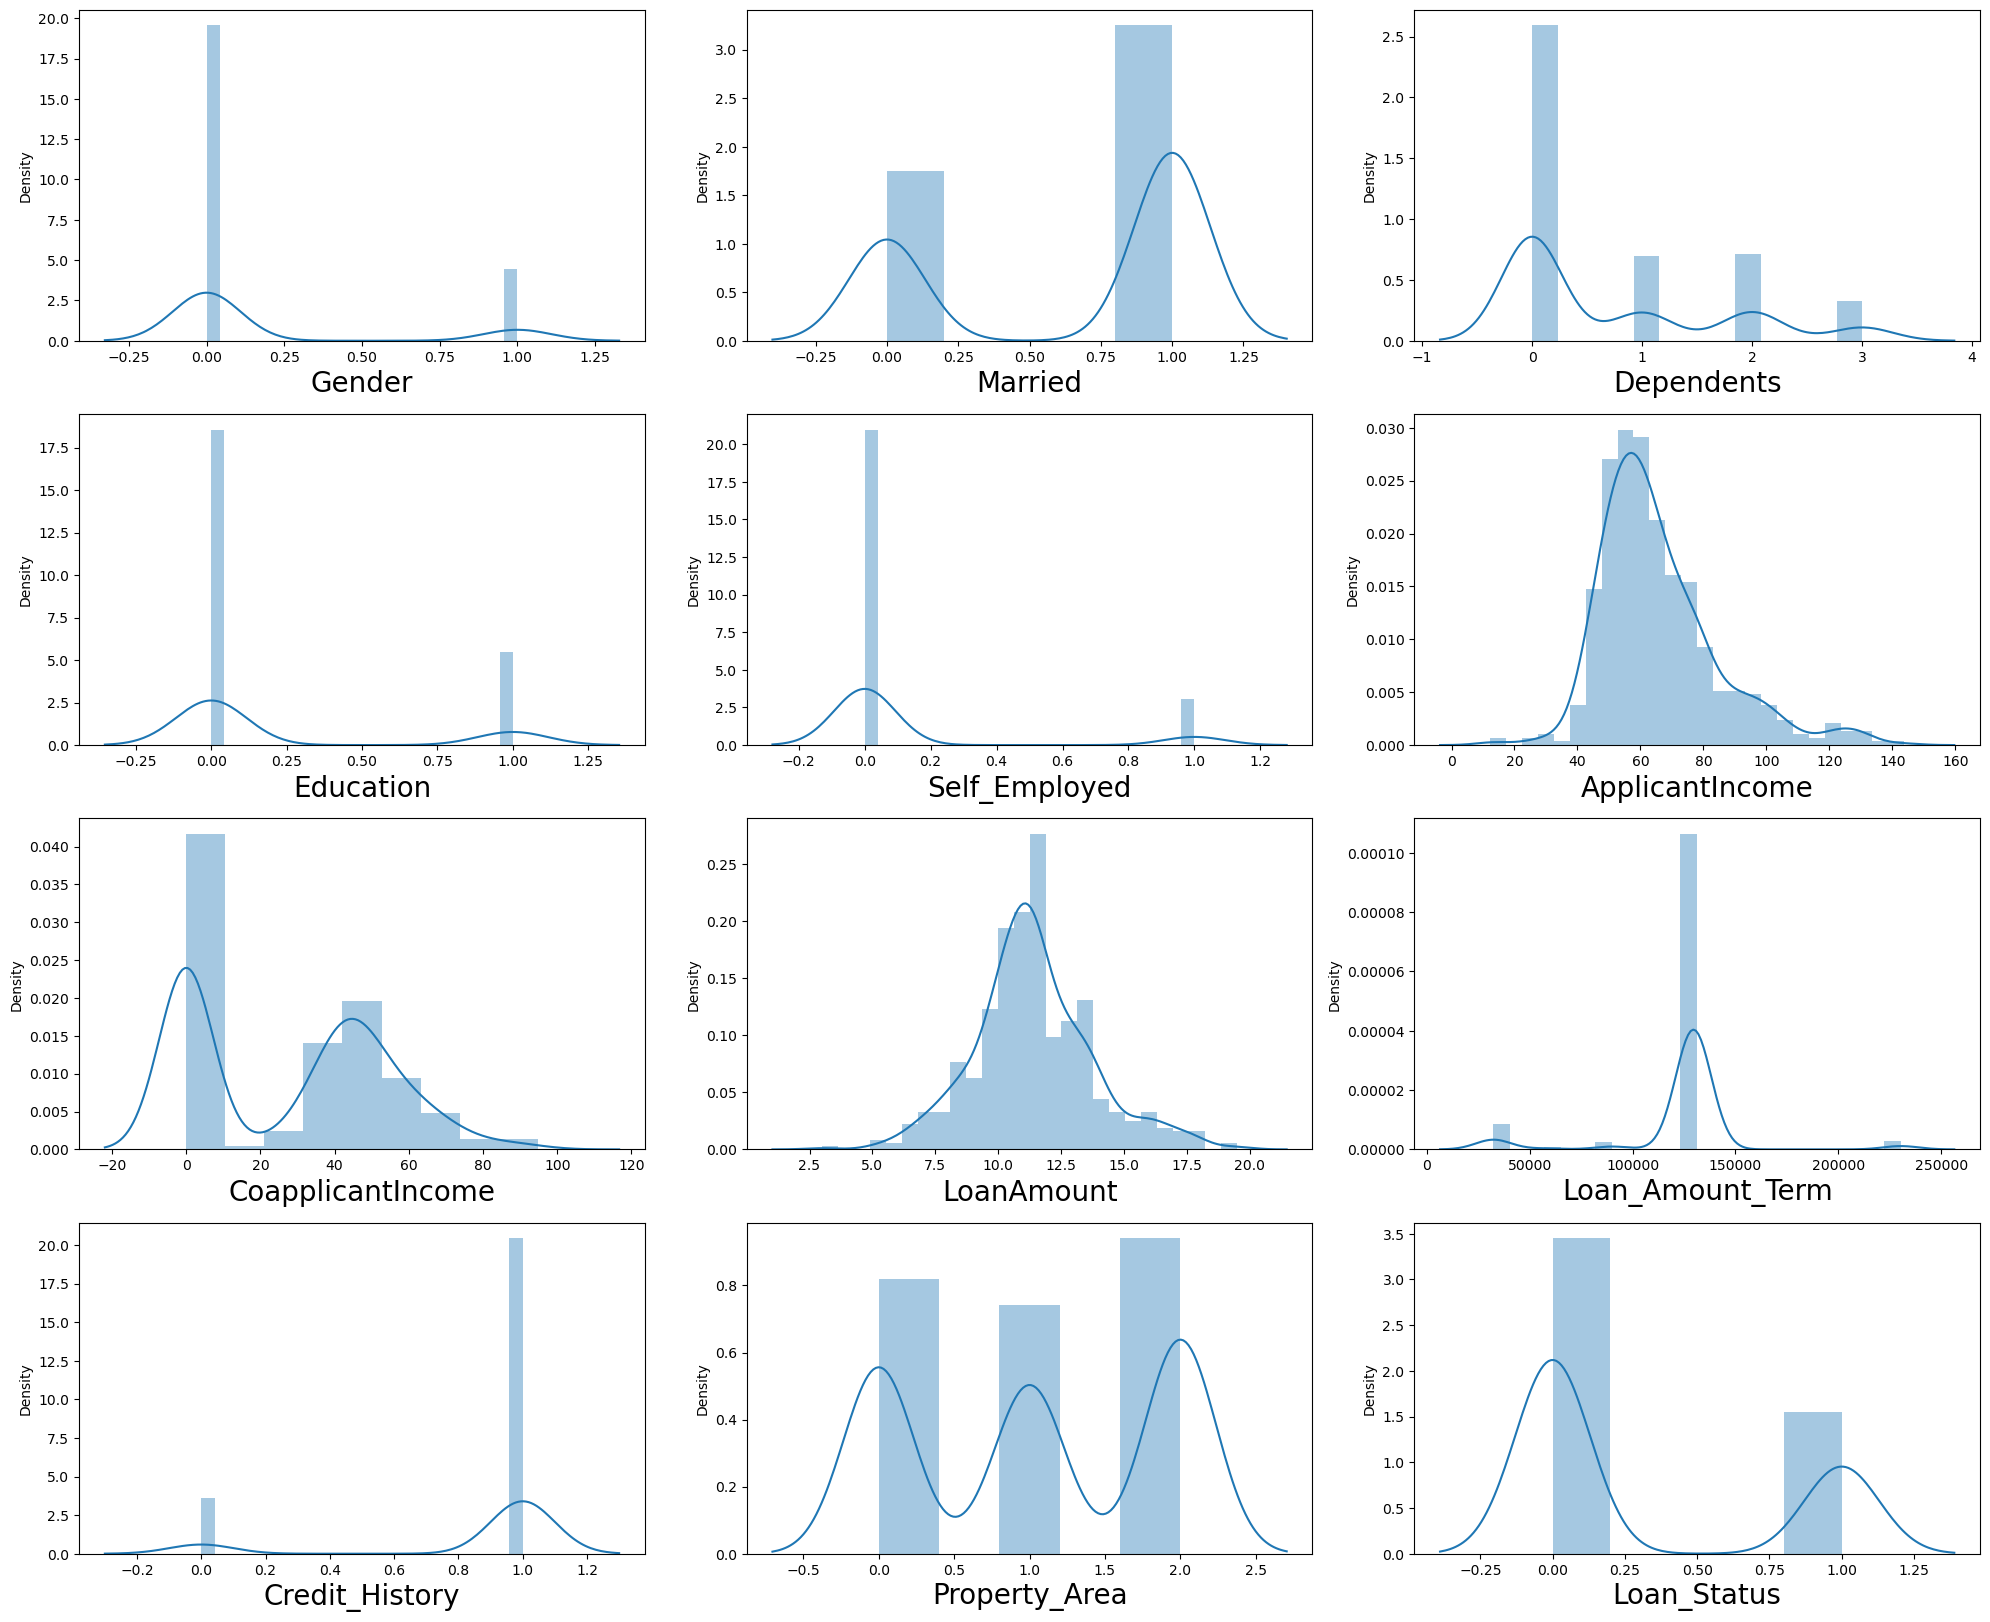

In [291]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [292]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.378997,-0.188162,-0.045696,0.006207,-0.043888,-0.223579,-0.169132,0.103435,-0.013172,0.073524,0.017408
Married,-0.378997,1.000000,0.329900,0.024817,-0.015779,-0.015274,0.301532,0.178289,-0.129881,0.019308,0.007820,-0.089026
Dependents,-0.188162,0.329900,1.000000,0.069814,0.044543,0.095908,-0.015384,0.133323,-0.084812,-0.020288,0.014280,-0.017872
Education,-0.045696,0.024817,0.069814,1.000000,-0.007139,-0.177608,0.010786,-0.135408,-0.078418,-0.075217,-0.006704,0.092658
Self_Employed,0.006207,-0.015779,0.044543,-0.007139,1.000000,0.238668,-0.068739,0.118771,-0.042996,-0.016390,0.027751,0.026525
ApplicantIncome,-0.043888,-0.015274,0.095908,-0.177608,0.238668,1.000000,-0.317194,0.447455,-0.071737,0.035231,-0.016208,0.005287
CoapplicantIncome,-0.223579,0.301532,-0.015384,0.010786,-0.068739,-0.317194,1.000000,0.256937,-0.026994,-0.002648,0.035853,-0.064145
LoanAmount,-0.169132,0.178289,0.133323,-0.135408,0.118771,0.447455,0.256937,1.000000,0.034021,0.000282,0.054420,0.025614
Loan_Amount_Term,0.103435,-0.129881,-0.084812,-0.078418,-0.042996,-0.071737,-0.026994,0.034021,1.000000,0.014661,0.091949,0.037827
Credit_History,-0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.035231,-0.002648,0.000282,0.014661,1.000000,0.041685,-0.560936


<Axes: >

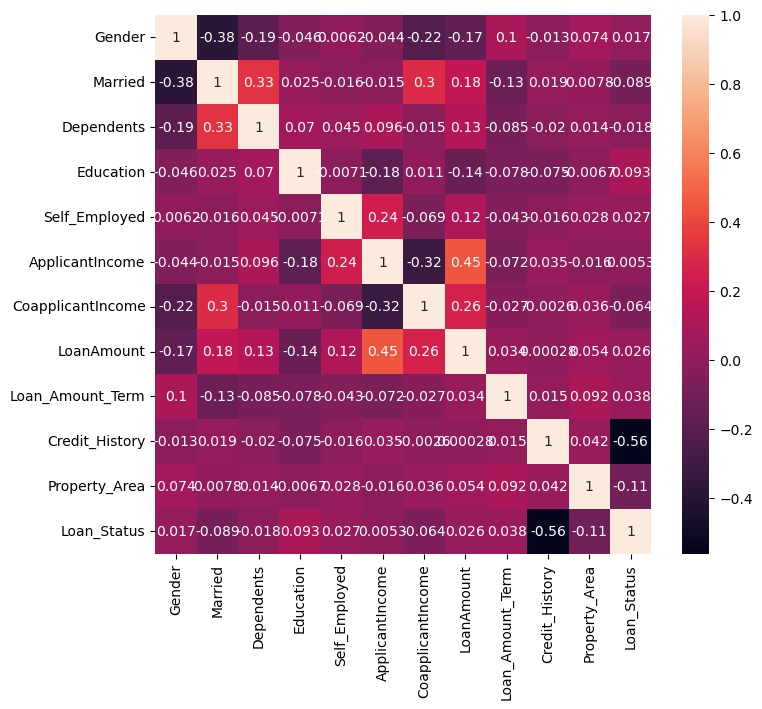

In [293]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True) 

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [295]:
X = data.drop(['Loan_Status'], axis =1)
Y = data['Loan_Status']

In [296]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
                        for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,1.224249,Gender
1,1.384656,Married
2,1.174091,Dependents
3,1.062952,Education
4,1.066021,Self_Employed
5,1.800416,ApplicantIncome
6,1.582407,CoapplicantIncome
7,1.664803,LoanAmount
8,1.059262,Loan_Amount_Term
9,1.010969,Credit_History


In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.30,random_state=65)
print('Training size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training size: (403, 11)
Training target size: (403,)
Test size: (174, 11)
Test target size: (174,)


MODEL BULIDING (Classification model)

In [299]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}

In [300]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"{model_name} accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))

LogisticRegression accuracy: 0.7931034482758621
[[109   1]
 [ 35  29]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       110
           1       0.97      0.45      0.62        64

    accuracy                           0.79       174
   macro avg       0.86      0.72      0.74       174
weighted avg       0.83      0.79      0.77       174

RandomForestClassifier accuracy: 0.7931034482758621
[[109   1]
 [ 35  29]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       110
           1       0.97      0.45      0.62        64

    accuracy                           0.79       174
   macro avg       0.86      0.72      0.74       174
weighted avg       0.83      0.79      0.77       174

ExtraTreesClassifier accuracy: 0.7816091954022989
[[105   5]
 [ 33  31]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1      

In [301]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")


LogisticRegression CV mean accuracy: 81.81% ± 2.41%
RandomForestClassifier CV mean accuracy: 79.73% ± 2.61%
ExtraTreesClassifier CV mean accuracy: 77.64% ± 1.00%
SVC CV mean accuracy: 81.81% ± 3.02%
GradientBoostingClassifier CV mean accuracy: 78.69% ± 3.05%
AdaBoostClassifier CV mean accuracy: 79.39% ± 3.27%
BaggingClassifier CV mean accuracy: 78.35% ± 2.96%
DecisionTreeClassifier CV mean accuracy: 74.19% ± 4.22%


In [302]:
LG=LogisticRegression()

In [303]:
LG.fit(X_train,Y_train)

LogisticRegression()

In [304]:
parameters={ 
    'penalty': ['l2'],               
    'C': [0.01, 0.1, 1, 10, 100],   
    'solver': ['lbfgs'],             
    'max_iter': [100, 200, 300],    
    'tol': [1e-4, 1e-3, 1e-2],       
    'fit_intercept': [True],         
    'class_weight': ['balanced'],    
    'multi_class': ['auto'],         
    'random_state': [42],            
    'verbose': [0] 
}

In [305]:
grid_GBC = GridSearchCV(LG, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'fit_intercept': [True],
                         'max_iter': [100, 200, 300], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['lbfgs'], 'tol': [0.0001, 0.001, 0.01],
                         'verbose': [0]})

In [306]:
filename="Loan_Model.pkl"
pickle.dump(LG,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(X_test,Y_test)
print(result)

0.7931034482758621
